# Credit Card Transactions Dataset

*This dataset was published on Kaggle at [this link](https://www.kaggle.com/datasets/rajatsurana979/comprehensive-credit-card-transactions-dataset/). It was updated, at the time of writing, on 20th October 2023*

*This notebook is my own work, and I am its sole author. In it, I show how I would, typically, approach this kind of data. I began composing it on 30th October 2023*

# Used Packages

This section includes all of the packages I typically use when analysing the datasets I work with. For each cell, refer to comments at the top to see what the different packages are used for.

In [1]:
#Packages for functions and data types
import math
import scipy
from scipy import stats
from statistics import mode
import random
import datetime as dt
import csv

In [2]:
# Packages for data structures
import numpy as np
import pandas as pd

In [3]:
#Data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline

In [4]:
# Colours used for data visualisations
colours = ['firebrick','crimson','red','orangered','tomato',
           'coral', 'darkorange', 'orange','gold','yellow',
           'greenyellow', 'chartreuse','lawngreen','lime','limegreen',
           'forestgreen', 'green', 'darkgreen', 'seagreen','mediumseagreen',
           'mediumspringgreen', 'springgreen', 'aquamarine', 'turquoise', 'mediumturquoise',
           'lightseagreen', 'darkturquoise', 'cyan', 'aqua', 'lightskyblue',
           'deepskyblue', 'cornflowerblue', 'dodgerblue', 'royalblue', 'blue',
           'mediumblue', 'darkblue', 'navy', 'midnightblue', 'darkslateblue',
           'indigo', 'darkviolet', 'darkorchid', 'mediumorchid', 'orchid',
           'violet', 'fuchsia', 'lightpink', 'palevioletred', 'magenta',
           'hotpink', 'deeppink', 'mediumvioletred', 'darkmagenta', 'purple']

# Import & Process Data

In [6]:
# Importing dataset
trx = pd.read_csv('/kaggle/input/comprehensive-credit-card-transactions-dataset/credit_card_transaction_flow.csv',
                 encoding = 'unicode_escape', low_memory = False)

In [7]:
# exploring data
trx.shape

(50000, 9)

In [8]:
# exploring data
trx.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

In [9]:
# exploring data
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [10]:
# exploring data
trx.describe()

,Customer ID,Transaction Amount
count,50000.00000,50000.000000
mean,500136.79696,442.119239
std,288232.43164,631.669724
min,29.00000,5.010000
25%,251191.50000,79.007500
50%,499520.50000,182.195000
75%,749854.25000,470.515000
max,999997.00000,2999.880000


In [11]:
#exploring data
trx.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics


In [12]:
#checking rows with NA
trx[trx['Gender'].isnull()]

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel
6,124681,Thomas,Shaw,NaN,26-10-1976,145.94,30-08-2023,"Evans, Griffin and Torres",Cosmetic
17,793150,Chad,Reese,NaN,30-10-1962,475.82,22-04-2023,Hughes Inc,Market
21,943548,Daniel,Pitts,NaN,22-10-1995,39.87,01-06-2023,Shaw-Elliott,Clothing
24,111696,Anthony,Miller,NaN,23-10-1991,108.30,14-06-2023,"Nguyen, Patel and Dudley",Cosmetic
...,...,...,...,...,...,...,...,...,...
49948,870317,Lynn,Juarez,NaN,01-11-1953,19.06,10-08-2023,Cline-Jones,Market
49968,449767,John,Sanchez,NaN,21-10-1999,90.66,29-03-2023,Smith-Stewart,Clothing
49975,69254,Jeffrey,Lewis,NaN,30-10-1962,260.71,16-03-2023,Russell-Jackson,Travel
49987,902164,Victor,Reyes,NaN,31-10-1959,6.01,18-07-2023,"Cisneros, Graham and Glass",Market


## Convert Data Types & Add Helper Columns

To avoid confusion and to be able to identify any time-based trends, I will be converting the Customer ID from `int64` to `str`, and also map any dates to their respective months.

In [13]:
# recall column names of dataframe
trx.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

In [14]:
trx['Customer ID'] = trx['Customer ID'].astype('str')

In [15]:
#converting customer birthdates to datetime
trx['Birthdate'] = trx['Birthdate'].astype('datetime64[ns]')

/tmp/ipykernel_32/754485990.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  trx['Birthdate'] = trx['Birthdate'].astype('datetime64[ns]')


In [16]:
# converting transaction date to datetime
# had to use pd.to_datetime since .astype returned a ValueError
trx['Date'] = pd.to_datetime(trx['Date'], dayfirst = True)

In [17]:
# mapping birthdates of customers by month and by year (age)
trx['Cust_Month'] = trx['Birthdate'].dt.month
trx['Cust_Year'] = trx['Birthdate'].dt.to_period('y')

In [18]:
# checking dataframe
trx.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Cust_Month,Cust_Year
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,10,2002
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,10,1985
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,10,1981
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,10,1977
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,11,1951


In [19]:
# mapping transaction dates of customers by month-year
trx['Trx_Month'] = trx['Date'].dt.to_period('M')

In [20]:
#checking dataframe
trx.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Cust_Month,Cust_Year,Trx_Month
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,10,2002,2023-04
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,10,1985,2023-07
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,10,1981,2023-09
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,10,1977,2023-01
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,11,1951,2023-06


In [21]:
# final look at summary statistics after updating the dataframe
trx.describe()

,Birthdate,Transaction Amount,Date,Cust_Month
count,50000,50000.000000,50000,50000.000000
mean,1977-04-27 06:55:17.759999968,442.119239,2023-05-23 15:30:17.856000256,10.138900
min,1948-11-02 00:00:00,5.010000,2023-01-01 00:00:00,10.000000
25%,1962-10-30 00:00:00,79.007500,2023-03-13 00:00:00,10.000000
50%,1976-10-26 00:00:00,182.195000,2023-05-24 00:00:00,10.000000
75%,1991-10-23 00:00:00,470.515000,2023-08-03 00:00:00,10.000000
max,2005-10-19 00:00:00,2999.880000,2023-10-14 00:00:00,11.000000
std,NaN,631.669724,NaN,0.345846


# Analysis & Insights

So far, I have prepared and explored the data.
Recall that each row in the dataset is a single transaction, each transaction records:
1. A customer's unique ID
2. First name and Surname
3. Gender
4. Date of birth
5. Trx/Purchase/Bill Amount
6. Date of the transaction
7. Merchant/Shop the customer purchased from
8. The industry/service that the merchant/shop works in

I aim to look at this data from the following angles:
1. Time-based view: with time as my independent variable, I want to examine any seasonal behaviour by:

    a. Total Revenue (Trx amount)
    
    b. Total Trx count
    
    c. Count of unique customers
    
    I want to look at these time-based views aggregately, and by industry
    
2. Customer-based view: with the customer ID as my independent variable, I want to examine:

   a. Who are the most profitable customers
   
   b. Which shops and industries do they spend their money in
   
   c. Demographics (age and gender)

## Time-based View

In [22]:
# recalling the name of columns and their data types
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         50000 non-null  object        
 1   Name                50000 non-null  object        
 2   Surname             50000 non-null  object        
 3   Gender              44953 non-null  object        
 4   Birthdate           50000 non-null  datetime64[ns]
 5   Transaction Amount  50000 non-null  float64       
 6   Date                50000 non-null  datetime64[ns]
 7   Merchant Name       50000 non-null  object        
 8   Category            50000 non-null  object        
 9   Cust_Month          50000 non-null  int32         
 10  Cust_Year           50000 non-null  period[A-DEC] 
 11  Trx_Month           50000 non-null  period[M]     
dtypes: datetime64[ns](2), float64(1), int32(1), object(6), period[A-DEC](1), period[M](1)
memory usage: 4.

### Revenue

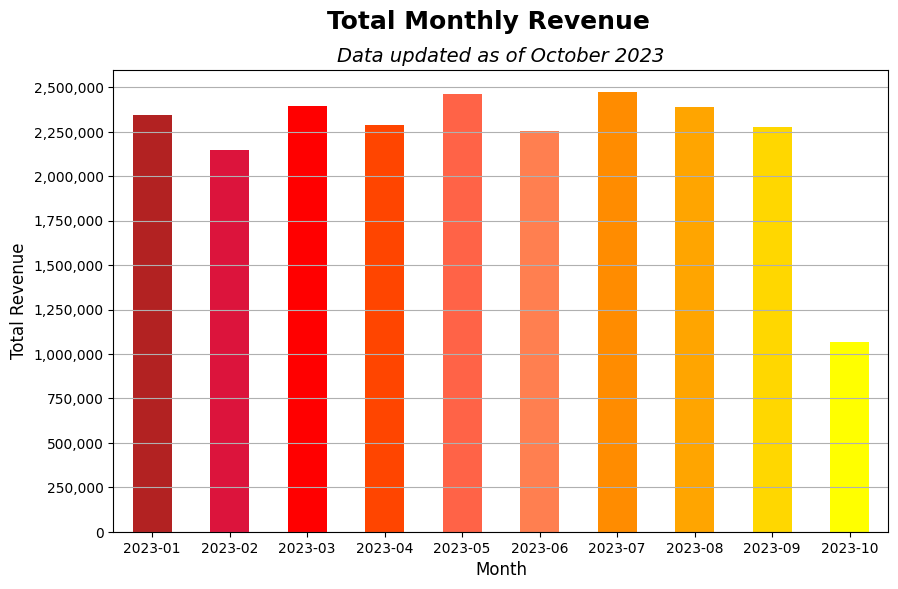

In [72]:
# Monthly revenue trend
trx.groupby('Trx_Month')['Transaction Amount'].sum().plot(kind = 'bar', 
                                                          color = colours, figsize = (10,6));
# Title format
plt.suptitle('Total Monthly Revenue', fontweight = 'bold', fontsize = 18)
plt.title('Data updated as of October 2023', style = 'italic', fontsize = 14)

# Format x-axis
plt.xticks(rotation = 0)
plt.xlabel('Month', fontsize = 12)

# Format y-axis
plt.yticks(np.arange(0,trx.groupby('Trx_Month')['Transaction Amount'].sum().max()+2.5*10**5,2.5*10**5))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);
plt.ylabel('Total Revenue', fontsize = 12)

# Adjust tick labels and gridlines
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.grid(axis = 'y')